## *Artificial Neural Networks*
### Aprendizagem Automática e Ciências de Dados

#### Grupo 4
#### Dinis Carraça Nº 14058 & José Feiteira Nº 14300

In [1]:
%reset -f

## Requirements

In [2]:
pip install -r requirements.txt

  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached wrapt-2.0.1-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached h5

  You can safely remove it manually.


## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

C:\Users\dinis\anaconda3\envs\SVM\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## 0. Operações Gerais

In [5]:
df = pd.read_csv('df_group4_classe.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   daily_active_users_per_1k       255 non-null    float64
 1   avg_session_duration            255 non-null    float64
 2   screens_per_session             255 non-null    float64
 3   conversion_rate                 255 non-null    float64
 4   retention_30d                   255 non-null    float64
 5   crash_rate_per_1k               255 non-null    float64
 6   avg_latency_ms                  255 non-null    float64
 7   support_tickets_per_1k_users    255 non-null    float64
 8   bug_fix_time_days               255 non-null    float64
 9   deployment_frequency_per_month  255 non-null    float64
 10  nps_score                       255 non-null    float64
 11  app_store_rating                255 non-null    float64
 12  revenue_per_user                255 

,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user,classe
0,1.365073,0.767327,0.261780,0.676673,-0.618089,1.463434,1.076442,0.883539,-0.825774,0.216563,-0.637735,-0.498733,0.016407,-0.014631,2
1,0.014407,-0.053756,-0.834279,0.398714,-0.686036,0.679254,-0.292061,0.577403,-0.187967,-0.608288,0.158461,1.145959,0.262016,-0.139845,3
2,-0.794565,-1.364828,-0.794455,-1.274230,0.337830,-0.048939,-0.509421,-0.112958,0.281242,1.655167,-0.815757,-0.610258,-0.216664,0.849675,5
3,-0.025550,-0.712952,-0.362806,-0.316390,-1.306883,-0.596438,-0.276956,-0.117813,-0.603625,0.580689,0.335633,-0.379222,-0.537343,0.641942,1
4,-0.008756,0.934050,1.951810,0.211716,0.407337,-0.115187,-0.569544,1.330020,1.050071,0.917485,0.273601,-0.347407,1.275343,0.369823,4


In [6]:
x = df.drop(columns =['classe'])
y = df['classe'] # Output
y = y - 1

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state = 42)

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

y_treino_cat = to_categorical(y_treino, num_classes=5)
y_teste_cat = to_categorical(y_teste, num_classes=5)

feature_names = x.columns

## 1. Criação da ANN 1

In [7]:
modelo = Sequential([
    Input(shape=(x_treino.shape[1],)), # Input Layer 
    Dense(64, activation='relu'), # 1ª Layer
    Dropout(0.3), # 2ª Layer
    Dense(32, activation='relu'), # 3ª Layer
    Dense(5, activation='softmax') # Layer Final
])

modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

modelo.summary(print_fn=lambda x: print(x))


Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘
 Total params: 3,205 (12.52 KB)
 Trainable params: 3,205 (12.52 KB)
 Non-trainable params: 0 (0.00 B)



Como podemos reparar o nosso modelo tem cerca de 3200 parâmetros com os quais treinará, pelo facto de se tratar de uma modelo simples e leve, este processo será rápido.

Existe também pouco risco de acontecer overfitting para datasets de pequeno / médio tamanho, como é o caso do nosso.

Se por ventura ocorrer overfit ou underfit:

- Overfit - Aumentar o dropout e diminuir o número de neurónios utilizados;
- Underfit - Acrescentar neurónios e/ou layers;


## 2. Treinar o modelo

In [8]:
historia = modelo.fit(
    x_treino, y_treino_cat,
    validation_split=0.3, # 30% dos dados para validação do modelo
    epochs=50, # Quantidade de vezes que o modelo percorre o dataset de treino
    batch_size=32, # Quantidade de samples por vez
    verbose=1 
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2339 - loss: 1.6647 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.2222 - val_loss: 1.7295
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - Precision: 0.6000 - Recall: 0.0242 - accuracy: 0.3468 - loss: 1.5253 - val_Precision: 1.0000 - val_Recall: 0.0370 - val_accuracy: 0.2407 - val_loss: 1.6514
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - Precision: 0.8889 - Recall: 0.0645 - accuracy: 0.3548 - loss: 1.4590 - val_Precision: 1.0000 - val_Recall: 0.0556 - val_accuracy: 0.3704 - val_loss: 1.5869
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - Precision: 0.8000 - Recall: 0.0323 - accuracy: 0.4516 - loss: 1.3702 - val_Precision: 1.0000 - val_Recall: 0.0556 - val_accuracy: 0.4074 - val_loss: 1.5305
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - Precision: 0.9167 - Recall: 0.0887 - accuracy: 0.4677 - loss: 1.3430 - val_Precision: 1.0000 - val_Recal

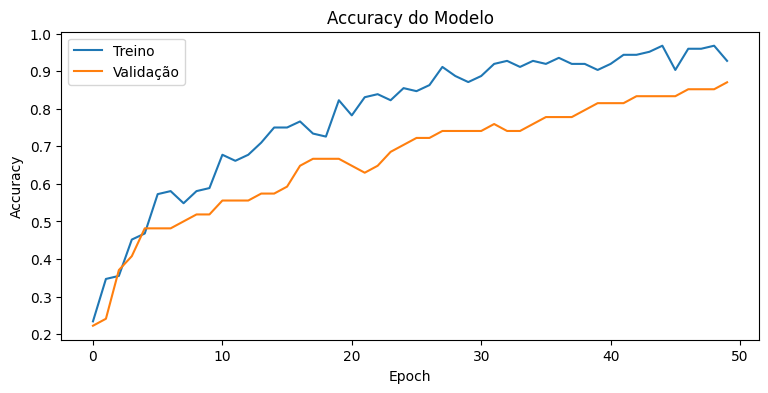

In [9]:
plt.figure(figsize=(9,4))

# Accuracy
plt.plot(historia.history['accuracy'], label='Treino')
plt.plot(historia.history['val_accuracy'], label='Validação')
plt.title('Accuracy do Modelo')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig("accuracy_modelo_st.png", dpi=300, bbox_inches='tight')
plt.legend()


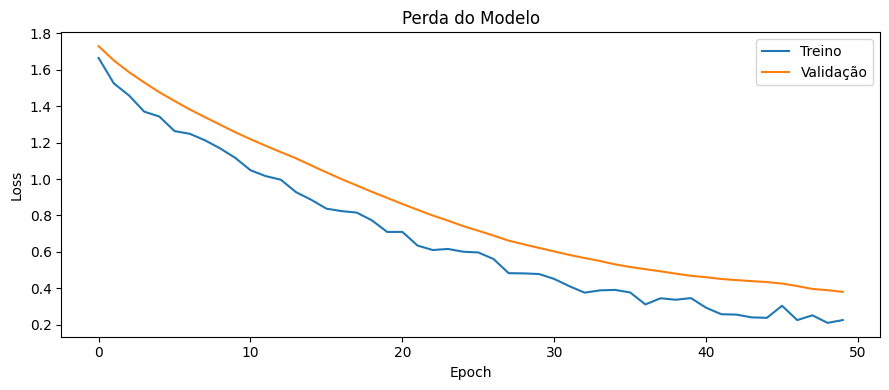

In [10]:
# Loss
plt.figure(figsize=(9,4))
plt.plot(historia.history['loss'], label='Treino')
plt.plot(historia.history['val_loss'], label='Validação')
plt.title('Perda do Modelo')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("loss_modelo_st.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

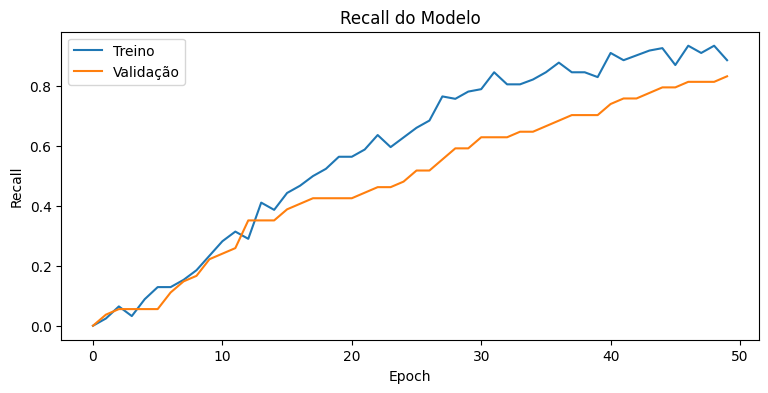

In [11]:
plt.figure(figsize=(9,4))

# Accuracy
plt.plot(historia.history['Recall'], label='Treino')
plt.plot(historia.history['val_Recall'], label='Validação')
plt.title('Recall do Modelo')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.savefig("recall_modelo_st.png", dpi=300, bbox_inches='tight')
plt.legend()


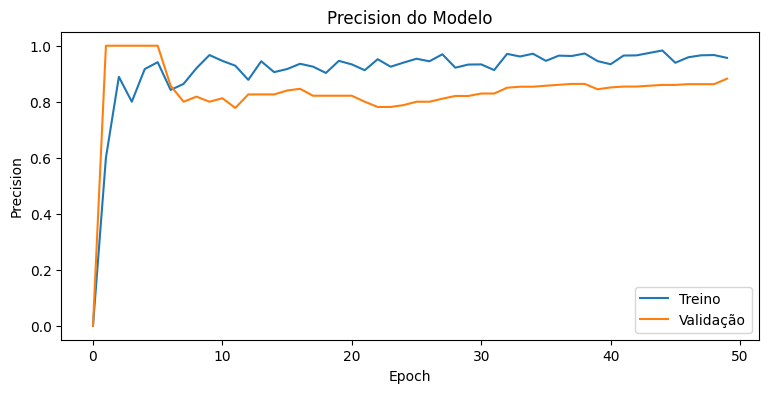

In [12]:
plt.figure(figsize=(9,4))

# Accuracy
plt.plot(historia.history['Precision'], label='Treino')
plt.plot(historia.history['val_Precision'], label='Validação')
plt.title('Precision do Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.savefig("precision_modelo_st.png", dpi=300, bbox_inches='tight')
plt.legend()

Como podemos ver, a accuracy do modelo foi aumentando progressivamente consoante o números de epochs percorrido, os valores desta para a validação são menores do que no treino, expectável, apesar disso o alto valor, ~85% mostra que o modelo consegue prever corretamente dados ainda não vistos.

Os valores elevados quer do recall, quer da precision, indicam que, no espectro global, as amostras são corretamente classificadas.

A perda decresce com cada epoch concluído, mostrando que o modelo cria previsões corretas e confiantes no treino. Contudo a perda na validação apresenta um valor de quase o dobro quando comparada ao treino, ~50%, o que mostra um ligeiro overfit na validação, mas nada que vá criar problemas posteriormente.

## 3. Avaliar o Modelo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


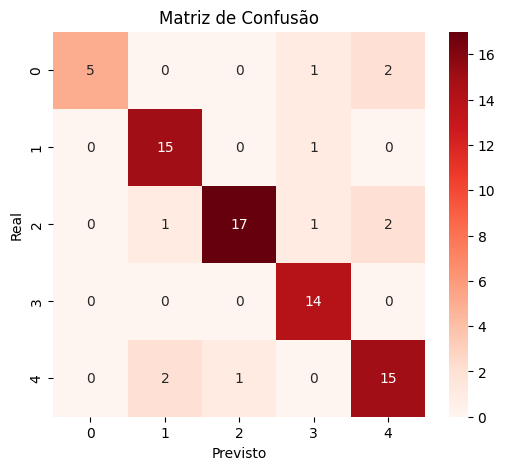

In [21]:
y_pred = modelo.predict(x_teste)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_teste, y_pred_classes)

labels = [0, 1, 2, 3, 4]
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.savefig("matriz_confusão_m1.png", dpi=300, bbox_inches='tight')

plt.show()


In [24]:
print(classification_report(y_teste, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.83      0.94      0.88        16
           2       0.94      0.81      0.87        21
           3       0.82      1.00      0.90        14
           4       0.79      0.83      0.81        18

    accuracy                           0.86        77
   macro avg       0.88      0.84      0.85        77
weighted avg       0.87      0.86      0.85        77



Da matriz de confusão e métricas vimos que a classe 1 apresenta o desempenho mais fraco, com um recall de 75%, dado o reduzido número de amostras disponíveis apenas 8. No entanto, a precision de 100% indica que, sempre que o modelo prevê esta classe, a previsão é correta.

As restantes classes, têm todas valores semelhantes, mostrando que o modelo tem um desempenho equilibrado entre elas.

Existe uma boa distribuição nas classes, macro e weighted average com valores perto dos 90%;

Logo chegamos à conclusão de que o modelo realiza um bom trabalho no ambiente geral do dataset.
Ou seja, mesmo apesar do ligeiro overfitting detetado anteriormente, não existe nenhuma classe com maior agregação de valores quando comparando com as restantes.

## 4. Conclusões

Depois de todas as etapas estarem concluídas conseguimos chegar às seguintes conclusões:

- O modelo aparenta ser bastante bom a escolher a classe 5, o que será um bom sinal se o nosso objetivo é não deixar nenhuma classe 5 passar despercebida;
- Contudo este bias vai afetar os nossos resultados quando quiseremos focar nas restantes classes, existe a possibilidades dos elementos nestas presentes serm falsamente classificados como se fossem da classe 5, irão existir muitos "falsos positivos";

Assim o modelo será uma boa abordagem sempre que a classe 5 for algo crítico, caso contrário o viés existente pode levar a análises erradas.